# Decision Tree - IMT 572 Final Projet - Group 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
%store -r data
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Measles
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.538431
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.229557
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.200629
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1.300354
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1.405801


In [3]:
data.drop(['Country','Year','percentage expenditure','Total expenditure','Population', ' thinness 5-9 years'], axis=1, inplace=True)
data.columns


Index(['Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling', 'Measles'],
      dtype='object')

In [4]:
df_X = data.drop(['Life expectancy '], axis=1)
df_y = data['Life expectancy ']

In [5]:

print(df_X.columns)
print(df_y)

Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS',
       'GDP', ' thinness  1-19 years', 'Income composition of resources',
       'Schooling', 'Measles'],
      dtype='object')
0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64


In [6]:
X = df_X
y = df_y

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2350, 15)
(588, 15)
(2350,)
(588,)


In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [10]:
from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  


In [11]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([3.28374476e-01, 1.48299291e-01, 1.05290276e-01, 8.24512090e-02,
       5.22184370e-02, 5.00582055e-02, 4.41093772e-02, 3.87678458e-02,
       3.71893601e-02, 2.93192908e-02, 2.56098523e-02, 2.44124318e-02,
       2.08725524e-02, 1.28538805e-02, 1.73514842e-04])

Text(0.5, 1.0, 'variance')

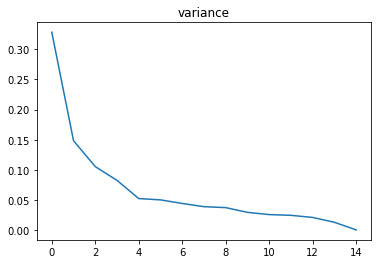

In [12]:
pca = {'PC1','PC2','PC3','PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13', 'PC14', 'PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22'}
plt.plot(explained_variance)
plt.title("variance")

In [13]:
from sklearn.decomposition import PCA

pca = PCA(0.95)  
X_train = pca.fit_transform(X_train)  
X_test= pca.transform(X_test)  
print(X_train.shape)
print(X_test.shape)

(2350, 12)
(588, 12)


In [14]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=4)
DecisionTreeRegressor.fit (X_train, y_train)
y_pred = (DecisionTreeRegressor.predict(X_test))
Data_Final= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Data_Final.head()

,Actual,Predicted
867,77.3,78.231485
1780,66.6,69.243421
621,52.6,55.799425
2715,61.5,69.243421
2717,60.0,55.799425


https://mlcorner.com/linear-regression-vs-decision-trees/

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.3434339492769936
Mean Squared Error: 21.557097823751608
Root Mean Squared Error: 4.642962182029012


In [16]:
print(DecisionTreeRegressor.score(X_train, y_train))

0.8222936991171104


In [17]:
#Adjusted Squared Value (.95 PCA)
adjusted_r_squared = 1 - (1-DecisionTreeRegressor.score(X_train, y_train))*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)
print(adjusted_r_squared)

0.8213812149020506


In [18]:
pca = PCA(0.75)  
X_train = pca.fit_transform(X_train)  
X_test= pca.transform(X_test)  
DecisionTreeRegressor.fit (X_train, y_train)
y_pred = (DecisionTreeRegressor.predict(X_test))
print(DecisionTreeRegressor.score(X_train, y_train))

0.8180724873259589
